In [1]:
# 制作数据集
import sys
import os
root = "/data/public/renhaoye/morphics/"
subdirs = [os.path.join(root, d) for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
for subdir in subdirs:
    sys.path.append(subdir)

In [2]:
from astropy.io import fits
from sklearn.model_selection import train_test_split
from utils.utils import *
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
"""local files in DECaLS"""
df_in_decals = load_dir(root + "/dataset/in_decals/raw_fits/")
"""local files in BASS+MzLS"""
df_out_decals = load_dir(root + "/dataset/out_decals/scaled/")
df_sdss_mgs = load_dir(root + "/dataset/sdss/integration/")
"""main galaxy sample"""
with fits.open(root + "dataset/VAGC_MGS-m14_1777--20180116.fits") as hdul:
    ra = np.array(hdul[1].data["RA      "])
    dec = np.array(hdul[1].data["DEC     "])
    petro_mag = np.array(hdul[1].data["PETROMAG"][:, 2])
    model_mag = np.array(hdul[1].data["MODELMAG"][:, 2])
    fiber_mag = np.array(hdul[1].data["FIBERMAG"][:, 2])
    kcorrect = np.array(hdul[1].data["KCORRECT"][:, 2])
    z = np.array(hdul[1].data["Z"])
    zflag = np.array(hdul[1].data["ZFLAG"])
    MGS = pd.DataFrame(np.array((ra, dec, petro_mag, model_mag, fiber_mag, kcorrect, z, zflag)).T, columns=["ra", "dec", "petro_mag", "model_mag", "fiber_mag", "kcorrect", "z", "zflag"])
# """overlap of DECaLS and BASS+MzLS"""
# overlap = match(df_in_decals, df_out_decals, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
df_c = pd.read_csv(root + "/dataset/gz_decals_volunteers_c.csv", index_col=0).rename(columns=lambda x: x.replace("-", "_")).fillna(0)

In [4]:
out_path = root + "/dataset/out_decals/scaled/"
with open(root + "dataset/out_decals.txt", "w") as w:
    for i in range(len(df_out_decals)):
        ra = df_out_decals.iloc[i, 0]
        dec = df_out_decals.iloc[i, 1]
        # print(out_path + str(ra) +"_"+str(dec)+".fits")
        if os.path.exists(out_path + str(ra) +"_"+str(dec)+".fits"):
            w.writelines(out_path + str(ra) +"_"+str(dec)+".fits\n")

In [5]:
df_out_decals

,ra,dec
0,254.086200,34.382434
1,113.090361,39.966851
2,356.073783,0.785788
3,248.085546,40.393064
4,222.090791,40.494290
...,...,...
259318,160.442412,50.965611
259319,217.396797,42.644278
259320,209.959664,34.763253
259321,232.973994,57.258931


In [6]:
mgs_out_decals = match(df_out_decals[["ra", "dec"]], MGS, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
mgs_out_decals

,ra,dec,petro_mag,model_mag,fiber_mag,kcorrect,z,zflag
0,254.086200,34.382434,17.497099,17.390890,18.438908,-0.070683,0.131587,1.0
1,113.090361,39.966851,17.406330,17.394701,18.264536,-0.085500,0.111358,1.0
2,356.073783,0.785788,17.683458,17.741369,18.998924,-0.108742,0.049892,1.0
3,248.085546,40.393064,16.783379,16.778845,19.189617,0.000000,0.000000,0.0
4,222.090791,40.494290,17.655195,17.711962,18.332808,-0.103748,0.079318,1.0
...,...,...,...,...,...,...,...,...
259318,160.442412,50.965611,17.470362,17.485048,18.871605,-0.058748,0.153879,1.0
259319,217.396797,42.644278,15.777389,15.463521,18.094423,-0.125067,0.061699,1.0
259320,209.959664,34.763253,17.181618,17.135927,18.977999,-0.103997,0.092208,1.0
259321,232.973994,57.258931,15.988348,15.755253,17.852697,-0.123093,0.071466,1.0


In [7]:
mgs_out_decals_sdss = match(df_sdss_mgs[["ra", "dec"]], mgs_out_decals, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
mgs_out_decals_sdss

,ra,dec,petro_mag,model_mag,fiber_mag,kcorrect,z,zflag
0,248.085546,40.393064,16.783379,16.778845,19.189617,0.000000,0.000000,0.0
1,222.090791,40.494290,17.655195,17.711962,18.332808,-0.103748,0.079318,1.0
2,223.928281,48.143946,17.403008,17.339443,18.197584,-0.119330,0.083806,1.0
3,111.967062,44.358709,17.752647,17.691950,18.412945,-0.104189,0.099477,1.0
4,122.651337,42.376288,16.481096,16.354923,17.702026,-0.100128,0.102492,1.0
...,...,...,...,...,...,...,...,...
174971,164.255777,46.047778,17.363237,17.333559,19.103756,-0.098517,0.142853,1.0
174972,139.366890,46.371248,16.205557,16.053406,17.760263,-0.125324,0.080965,1.0
174973,229.143075,56.953094,17.054174,17.032343,18.647470,-0.142685,0.069774,1.0
174974,210.385076,56.907520,17.423128,17.223619,18.502514,-0.136739,0.068784,1.0


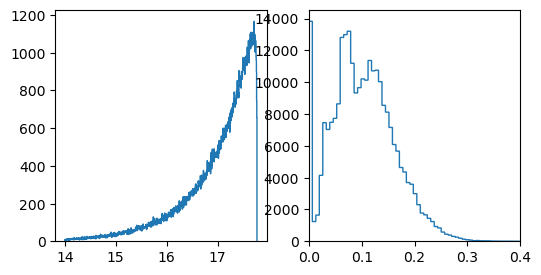

In [7]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.hist(mgs_out_decals.petro_mag, bins=1000, histtype="step")
plt.subplot(1, 2, 2)
plt.hist(mgs_out_decals.z, bins=1000, histtype="step")
plt.xlim((0, 0.4))
plt.show()

In [12]:
def get_each_question(df_c, votes):
    return df_c.query("smooth_or_featured_total_votes >= %d" % votes),\
           df_c.query("disk_edge_on_total_votes >= %d" % votes),\
           df_c.query("has_spiral_arms_total_votes >= %d" % votes),\
           df_c.query("bar_total_votes >= %d" % votes),\
           df_c.query("bulge_size_total_votes >= %d" % votes),\
           df_c.query("how_rounded_total_votes >= %d" % votes),\
           df_c.query("edge_on_bulge_total_votes >= %d" % votes),\
           df_c.query("spiral_winding_total_votes >= %d" % votes),\
           df_c.query("spiral_arm_count_total_votes >= %d" % votes),\
           df_c.query("merging_total_votes >= %d" % votes)
def get_total_question(df, votes, operator):
    if operator == ">=":
        return df.query("smooth_or_featured_total_votes >= %d | disk_edge_on_total_votes >= %d | has_spiral_arms_total_votes >= %d | bar_total_votes >= %d | bulge_size_total_votes >= %d | how_rounded_total_votes >= %d | edge_on_bulge_total_votes >= %d | spiral_winding_total_votes >= %d | spiral_arm_count_total_votes >= %d | merging_total_votes >= %d" %(votes, votes, votes, votes, votes, votes, votes, votes, votes, votes))
    if operator == "<=":
        return df.query("smooth_or_featured_total_votes >= 3 | disk_edge_on_total_votes >= 3 | has_spiral_arms_total_votes >= 3 | bar_total_votes >= 3 | bulge_size_total_votes >= 3 | how_rounded_total_votes >= 3 | edge_on_bulge_total_votes >= 3 | spiral_winding_total_votes >= 3 | spiral_arm_count_total_votes >= 3 | merging_total_votes >= 3").query("smooth_or_featured_total_votes <= %d | disk_edge_on_total_votes <= %d | has_spiral_arms_total_votes <= %d | bar_total_votes <= %d | bulge_size_total_votes <= %d | how_rounded_total_votes <= %d | edge_on_bulge_total_votes <= %d | spiral_winding_total_votes <= %d | spiral_arm_count_total_votes <= %d | merging_total_votes <= %d" %(votes, votes, votes, votes, votes, votes, votes, votes, votes, votes))

In [13]:
in_decals = match(df_in_decals, df_c, 2, ["real_ra", "real_dec"]).drop(columns=["ra", "dec"]).rename(columns={"real_ra":"ra", "real_dec":"dec"})
out_decals = match(df_out_decals, df_c, 2, ["real_ra", "real_dec"]).drop(columns=["ra", "dec"]).rename(columns={"real_ra":"ra", "real_dec":"dec"})
overlap = match(in_decals[["ra", "dec"]], out_decals, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
only_in_decals = pd.concat([in_decals, out_decals, out_decals]).drop_duplicates(keep=False)
only_out_decals = pd.concat([out_decals, in_decals, in_decals]).drop_duplicates(keep=False)
len(in_decals), len(out_decals), len(overlap), len(only_in_decals), len(only_out_decals)

(140931, 3713, 3618, 137313, 95)

In [14]:
sdss_in_decals = match(df_sdss_mgs, in_decals[["ra", "dec"]], 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})

In [15]:
sdss_in_decals

,ra,dec
0,255.791945,21.386024
1,146.189714,0.953666
2,323.650777,0.423026
3,141.424625,1.284698
4,203.340642,1.844477
...,...,...
140775,31.549623,-0.023739
140776,209.291461,7.238921
140777,169.954668,0.743151
140778,179.365011,-0.934022


In [16]:
overlap.to_csv(root + "/dataset/overlap.csv")
overlap

,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,active_learning_on,...,spiral_arm_count_cant_tell_fraction,merging_total_votes,merging_none,merging_none_fraction,merging_minor_disturbance,merging_minor_disturbance_fraction,merging_major_disturbance,merging_major_disturbance_fraction,merging_merger,merging_merger_fraction
0,40.000767,-1.258052,0.042710,-18.469593,134.46967,1.482779,3.728810,3.164304,active_baseline,False,...,0.000000,5,4,0.800000,1,0.200000,0,0.000000,0,0.000000
1,233.050173,32.597552,0.135748,-21.002930,107.62944,2.621211,8.112587,5.675371,active_baseline,False,...,0.000000,5,1,0.200000,1,0.200000,1,0.200000,2,0.400000
2,174.327184,32.032602,0.101902,-20.904877,223.53168,3.164304,8.034627,7.086768,active_baseline,False,...,0.000000,5,2,0.400000,3,0.600000,0,0.000000,0,0.000000
3,134.022675,32.510227,0.053277,-18.750320,113.18783,3.493677,8.705801,8.085743,active_priority,True,...,0.312500,44,19,0.431818,16,0.363636,7,0.159091,2,0.045455
4,140.472238,32.823737,0.057158,-19.749926,11947.65400,71.472510,96.698135,105.420820,active_baseline,False,...,0.000000,0,0,0.000000,0,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,131.500234,32.379075,0.109623,-20.890406,178.72615,2.019637,5.177910,4.523175,pre_active,False,...,0.000000,36,22,0.611111,14,0.388889,0,0.000000,0,0.000000
3614,41.572092,1.007004,0.077108,-19.645597,112.60097,2.571075,6.655635,5.675371,pre_active,False,...,0.333333,39,29,0.743590,1,0.025641,3,0.076923,0,0.000000
3615,156.215163,32.337451,0.143289,-21.756617,225.69269,1.971466,5.434039,4.589167,active_baseline,False,...,0.000000,3,3,1.000000,0,0.000000,0,0.000000,0,0.000000
3616,250.705199,31.871577,0.136063,-21.243150,127.72995,3.133896,10.427839,8.391453,active_baseline,False,...,0.000000,2,1,0.500000,0,0.000000,0,0.000000,1,0.500000


In [17]:
acc = get_total_question(in_decals, 34, ">=")
len(acc)

48256

In [18]:
only_in_decals_data = get_total_question(only_in_decals, 3, ">=")
len(only_in_decals_data), len(overlap)/len(only_in_decals_data)

(135599, 0.026681612696258822)

In [19]:
train, valid = train_test_split(only_in_decals_data, train_size=0.8266, random_state=1926)
valid = pd.concat([valid, overlap])
len(train), len(valid)

(112086, 27131)

In [20]:
train.to_csv(root + "/dataset/train.csv")
valid.to_csv(root + "/dataset/valid.csv")

In [21]:
q1, q2, q3, q4, q5, q6, q7, q8, q9, q10 = get_each_question(valid, 34)
len(q1), len(q2), len(q3), len(q4), len(q5), len(q6), len(q7), len(q8), len(q9), len(q10)

(9096, 1315, 978, 978, 978, 1587, 115, 695, 695, 7690)

In [22]:
question_answer_pairs = gz2_pairs
dependencies = gz2_and_decals_dependencies
schema = Schema(question_answer_pairs, dependencies)
label_cols = schema.label_cols
def get_galaxy_label(galaxy, label_cols):
    # no longer casts to int64, user now responsible in df. If dtype is mixed, will try to infer with infer_objects
    return galaxy[label_cols].infer_objects().values.squeeze()  # squeeze for if there's one label_col

In [23]:
func = ["train", "valid"]
dataset = [train, valid]
# for i in range(1):
for i in range(len(func)):
    with open(root + "/dataset/%s.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = root + "/dataset/in_decals/agmtn/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])

In [26]:
train_sdss = match(df_sdss_mgs, train, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
valid_sdss = match(df_sdss_mgs, valid, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})

In [27]:
train_sdss

,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,active_learning_on,...,spiral_arm_count_cant_tell_fraction,merging_total_votes,merging_none,merging_none_fraction,merging_minor_disturbance,merging_minor_disturbance_fraction,merging_major_disturbance,merging_major_disturbance_fraction,merging_merger,merging_merger_fraction
0,255.791945,21.386024,0.047523,-18.407532,121.15461,1.511694,4.611378,3.369279,active_baseline,False,...,0.000000,10,5,0.500000,2,0.200000,1,0.100000,2,0.200000
1,146.189714,0.953666,0.026734,-17.091427,111.06588,4.975659,12.865334,11.097967,pre_active,False,...,0.000000,35,32,0.914286,1,0.028571,1,0.028571,1,0.028571
2,323.650777,0.423026,0.121243,-20.550130,111.64426,3.570252,9.699334,7.582350,active_baseline,False,...,0.333333,5,3,0.600000,2,0.400000,0,0.000000,0,0.000000
3,141.424625,1.284698,0.069464,-20.682861,360.29523,3.544405,7.763114,7.373400,pre_active,False,...,0.142857,37,21,0.567568,11,0.297297,4,0.108108,1,0.027027
4,227.719599,28.779508,0.069896,-19.898237,169.27354,2.224385,5.540004,4.862905,active_baseline,False,...,0.000000,4,1,0.250000,0,0.000000,1,0.250000,2,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111966,31.549623,-0.023739,0.113004,-21.925318,432.11417,4.456124,15.784071,12.626719,pre_active,False,...,1.000000,37,5,0.135135,1,0.027027,1,0.027027,23,0.621622
111967,209.291461,7.238921,0.135322,-21.289719,151.86687,1.359357,4.087051,3.118802,active_baseline,False,...,0.000000,4,3,0.750000,1,0.250000,0,0.000000,0,0.000000
111968,169.954668,0.743151,0.069568,-21.425472,878.31824,5.217701,17.845497,13.209347,pre_active,False,...,0.000000,38,32,0.842105,5,0.131579,1,0.026316,0,0.000000
111969,179.365011,-0.934022,0.052162,-18.761251,112.97706,2.819223,5.699375,5.538606,pre_active,False,...,0.166667,83,71,0.855422,11,0.132530,1,0.012048,0,0.000000


In [28]:
func = ["train", "valid"]
dataset = [train_sdss, valid_sdss]
# for i in range(1):
for i in range(len(func)):
    with open(root + "/dataset/%s_sdss.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = root + "/dataset/sdss/integration/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])

In [29]:
overlap_train, overlap_valid = train_test_split(overlap, train_size=0.6, random_state=1926)
overlap_train_sdss = match(df_sdss_mgs, overlap_train, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})
overlap_valid_sdss = match(df_sdss_mgs, overlap_valid, 2, ["in_ra", "in_dec"]).drop(columns=["ra", "dec"]).rename(columns={"in_ra":"ra", "in_dec":"dec"})

In [30]:
func = ["overlap_train", "overlap_valid"]
dataset = [overlap_train, overlap_valid]
# for i in range(1):
for i in range(len(func)):
    with open(root + "/dataset/%s.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = root + "/dataset/out_decals/scaled/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])

In [31]:
func = ["overlap_train", "overlap_valid"]
dataset = [overlap_train_sdss, overlap_valid_sdss]
# for i in range(1):
for i in range(len(func)):
    with open(root + "/dataset/%s_sdss.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = root + "/dataset/sdss/integration/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])

In [10]:
func = ["acc"]
dataset = [acc]
# for i in range(1):
for i in range(len(func)):
    with open("/data/renhaoye/MorCG_DECaLS/dataset/mw_%s.txt" % func[i] , "w") as w:
        # for j in range(2,3):
        for j in range(len(dataset[i])):
            ra, dec = str(dataset[i].iloc[j, 0]), str(dataset[i].iloc[j, 1]),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
            path = "/data/renhaoye/MorCG/dataset/in_decals/agmtn/" + ra + "_" + dec + ".fits"
            if os.path.exists(path):
                w.write(path + " label:")
                for v in get_galaxy_label(dataset[i].iloc[j], label_cols):
                    w.write(str(v) + " ")
                w.write(" \n")
            else:
                print(path.split(".fits")[0])